<a href="https://colab.research.google.com/github/Ovizero01/Machine-Leaning/blob/main/013_Multiple%20Linear%20Regression%20and%20Polynomial%20Regression/013_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 13 - Practice Notebook
This notebook includes TODO markers **inside code cells** so students complete the missing parts.

In [2]:
#Import all required libraries
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt

## Load Insurance Dataset

In [3]:
# Load the insurance dataset
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
insurance = pd.read_csv(url)

# TODO: Display first 5 rows
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Dataset Overview

In [7]:
# TODO: Print dataset info
print(insurance.info())

# TODO: Print descriptive statistics
print(insurance.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
           count          mean           std        min         25%       50%  \
age       1338.0     39.207025     14.049960    18.0000    27.00000    39.000   
bmi       1338.0     30.663397      6.098187    15.9600    26.29625    30.400   
children  1338.0      1.094918      1.205493     0.0000     0.00000     1.000   
charges   1338.0  13270.422265  12110.011237  1121.8739  4740.28715  9382.033   

                   75%          max  
age          51.000000     64.0

## Define Features and Target

In [8]:
# TODO: Set numeric and categorical feature lists
numeric_features = ["age", "bmi", "children"]
categorical_features = ["sex", "smoker", "region"]

# TODO: Define target column
target = "charges"

# TODO: Create X and y
X = insurance[numeric_features + categorical_features]
y = insurance[target]

# TODO: Display X head
X.head()

,age,bmi,children,sex,smoker,region
0,19,27.900,0,female,yes,southwest
1,18,33.770,1,male,no,southeast
2,28,33.000,3,male,no,southeast
3,33,22.705,0,male,no,northwest
4,32,28.880,0,male,no,northwest


## Train Test Split

In [9]:
# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((1070, 6), (268, 6))

## Multiple Linear Regression Pipeline

In [16]:
# Build preprocessing transformer
preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features),
    ]
)

# TODO: Build full pipeline with LinearRegression
mlr_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("lin_reg", LinearRegression())
])

# TODO: Fit the model
mlr_model.fit(X, y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('lin_reg', LinearRegression())])

## Regression Performance Function

In [17]:
# TODO: Complete function to print performance
def print_performance(model, X, y):
    y_pred = mlr_model.predict(X)

    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))

## Evaluate Model

In [19]:
# Predict for train and test sets
y_train_pred = mlr_model.predict(X_train)
y_test_pred = mlr_model.predict(X_test)

# TODO: Print train and test performance
print("Train Performance:")
print(f"R² Score: {r2_score(y_train, y_train_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f}")

# Test performance
print("\nTest Performance:")
print(f"R² Score: {r2_score(y_test, y_test_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}")

Train Performance:
R² Score: 0.7415
RMSE: 6108.69

Test Performance:
R² Score: 0.7858
RMSE: 5766.40


## Inspect Coefficients

In [21]:
# Extract feature names after OneHotEncoding
ohe = mlr_model.named_steps["preprocess"].named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(categorical_features)

all_feature_names = numeric_features + list(cat_feature_names)

# Extract model coefficients
linreg = mlr_model.named_steps["lin_reg"]
coeffs = pd.DataFrame({"feature": all_feature_names, "coefficient": linreg.coef_})

# Print intercept and coefficients
print("Intercept:", linreg.intercept_)
coeffs.sort_values("coefficient", ascending=False)

Intercept: -11938.538576167135


,feature,coefficient
4,smoker_yes,23848.534542
2,children,475.500545
1,bmi,339.193454
0,age,256.856353
3,sex_male,-131.314359
5,region_northwest,-352.963899
7,region_southwest,-960.050991
6,region_southeast,-1035.022049


## Plot Actual vs Predicted

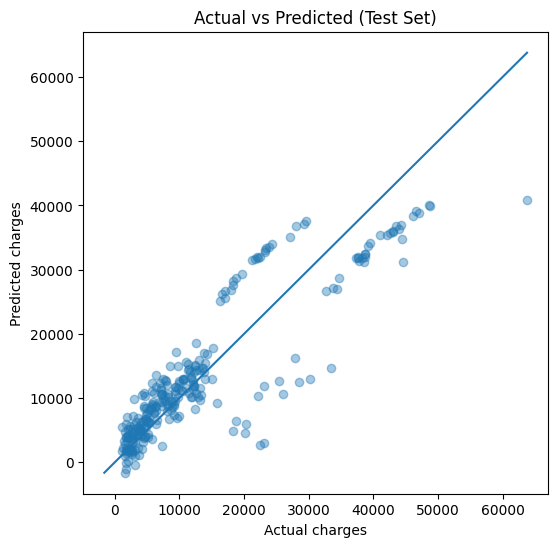

In [22]:
# Plot scatter of actual vs predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.4)
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.title("Actual vs Predicted (Test Set)")

# Add diagonal line
lims = [min(y_test.min(), y_test_pred.min()), max(y_test.max(), y_test_pred.max())]
plt.plot(lims, lims)

plt.show()

## Part B: Polynomial Regression Practice

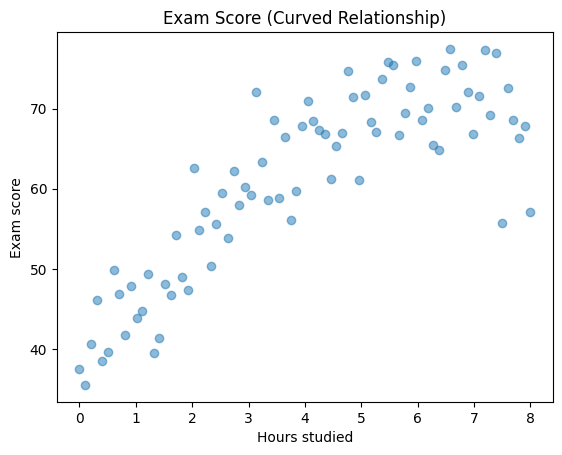

In [23]:
# Generate synthetic curved dataset
np.random.seed(42)

X_hours = np.linspace(0, 8, 80).reshape(-1, 1)
noise = np.random.normal(0, 5, size=X_hours.shape[0])

y_scores = 35 + 12 * X_hours[:, 0] - 1 * (X_hours[:, 0] ** 2) + noise

# Plot the data
plt.scatter(X_hours, y_scores, alpha=0.5)
plt.xlabel("Hours studied")
plt.ylabel("Exam score")
plt.title("Exam Score (Curved Relationship)")
plt.show()

In [24]:
# Train test split for polynomial data
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(
    X_hours, y_scores, test_size=0.2, random_state=42
)

In [25]:
# TODO: Create helper to fit polynomial model
def fit_polynomial_model(X_train, y_train, degree):
  model = Pipeline(steps=[
      ("poly", PolynomialFeatures(degree=degree, include_bias=False)),
      ("lin_reg", LinearRegression())
  ])
  model.fit(X_train, y_train)
  return model

In [26]:
# TODO: Fit models for degrees 1, 2, 3, 8
poly_models = {}
for degree in [1, 2, 3, 8]:
  poly_models[degree] = fit_polynomial_model(X_train_h, y_train_h, degree)

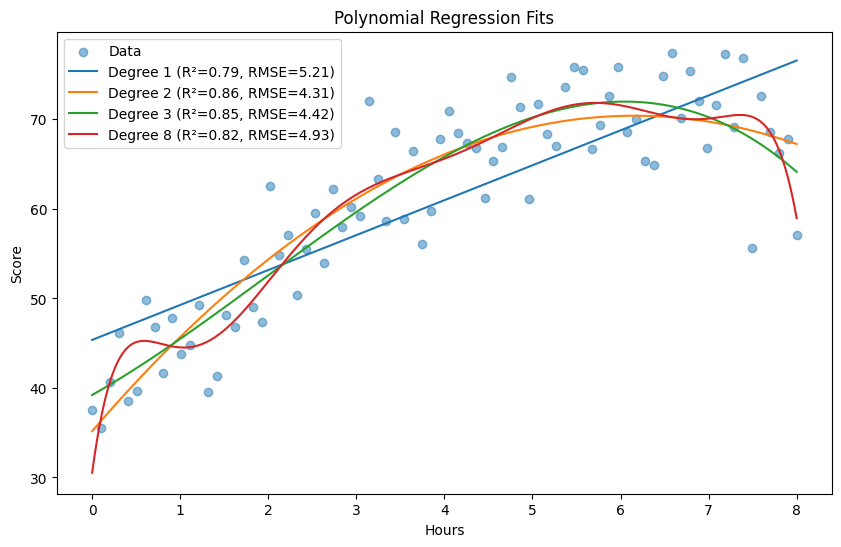

In [27]:
# TODO: Plot fitted curves for each degree (R2,RMSE)
X_plot = np.linspace(X_hours.min(), X_hours.max(), 300).reshape(-1, 1)

plt.figure(figsize=(10, 6))

plt.scatter(X_hours, y_scores, alpha=0.5, label="Data")

for degree, model in poly_models.items():
    y_plot_pred = model.predict(X_plot)
    y_test_pred = model.predict(X_test_h)

    r2 = r2_score(y_test_h, y_test_pred)
    rmse = np.sqrt(mean_squared_error(y_test_h, y_test_pred))

    plt.plot(
        X_plot,
        y_plot_pred,
        label=f"Degree {degree} (R²={r2:.2f}, RMSE={rmse:.2f})"
    )

plt.xlabel("Hours")
plt.ylabel("Score")
plt.title("Polynomial Regression Fits")
plt.legend()
plt.show()

## TODO: Final Reflection
Write answers to:
1. Which polynomial degree overfits and why
2. Which degree gives best generalization
3. What you learned about MLR and polynomial regression.

**1.**
Degree 8 overfits because it is overly complex, closely fitting noise in the training data and resulting in poorer performance on unseen test data.

**2.**
Degree 2 (or 3) gives the best generalization because it captures the underlying trend without excessive complexity, balancing bias and variance well.

**3.**
Multiple Linear Regression models linear relationships, while polynomial regression extends it to capture non-linear patterns by adding higher-degree features, but higher complexity increases the risk of overfitting.